<a href="https://colab.research.google.com/github/DerekLiu35/Spotify/blob/main/Copy_of_Spotify_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports/Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from scipy import stats

%matplotlib inline

# Download/Setup Data

In [ ]:
dreampop_data = pd.read_csv('dreampop.csv', index_col=0)
other_data = pd.read_csv('other.csv', index_col=0)

In [ ]:
#Combine data, drop non needed cols
data = dreampop_data.append(other_data, ignore_index=True)
data = data.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)
data.head()
           

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre
0,0.482,0.866,7,-4.534,1,0.0293,0.000368,0.11600,0.247,0.372,147.994,5gEni4dmBqme8fyPcyWYiK,187364,4,Kate's Not Here - Day Wave & Lawrence Rothman ...,Lawrence Rothman,dreampop
1,0.543,0.498,9,-10.152,1,0.0678,0.692000,0.43200,0.078,0.815,113.392,0l4cR2AZ18MktMd0BU3zwh,241097,4,Tenderness,Jay Som,dreampop
2,0.644,0.756,7,-8.342,1,0.0273,0.567000,0.15800,0.151,0.802,120.030,04DdNbTmZAgHfNP6FdY3Sa,264955,4,Plum,Widowspeak,dreampop
3,0.508,0.798,1,-5.412,0,0.0259,0.256000,0.20200,0.701,0.481,153.950,22gjW0ccBALzqASrryR7Dw,213481,4,Opportunity,Kevin Krauter,dreampop
4,0.562,0.724,2,-6.787,1,0.0622,0.203000,0.00115,0.129,0.464,139.997,4kDqNIQiBwkqDs6jWWcHAM,166453,4,What Does It Mean To Me?,Oberhofer,dreampop


In [ ]:
#Counts per genre
data.groupby('genre').count()[['id']].sort_values(by='id', ascending=False)

,id
genre,
dreampop,11722
acoustic,100
rainy-day,100
punk-rock,100
punk,100
...,...
emo,100
world-music,100
pop-film,96


In [ ]:
#Create genre ids
genres = list(data.groupby('genre').count().index)
genre_to_id = {}
id_to_genre = {}
for i, g in enumerate(genres):
    genre_to_id[g] = i
    genre_to_id[i] = g
#maybe handle the genres with a different encoder for further optimization

In [ ]:
#Map genres
data['genre_id'] = data['genre'].apply(lambda x: genre_to_id[x])
data['is_dreampop'] = data['genre'].apply(lambda x: True if x == 'dreampop' else False)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre,genre_id,is_dreampop
0,0.482,0.866,7,-4.534,1,0.0293,0.000368,0.11600,0.247,0.372,147.994,5gEni4dmBqme8fyPcyWYiK,187364,4,Kate's Not Here - Day Wave & Lawrence Rothman ...,Lawrence Rothman,dreampop,28,True
1,0.543,0.498,9,-10.152,1,0.0678,0.692000,0.43200,0.078,0.815,113.392,0l4cR2AZ18MktMd0BU3zwh,241097,4,Tenderness,Jay Som,dreampop,28,True
2,0.644,0.756,7,-8.342,1,0.0273,0.567000,0.15800,0.151,0.802,120.030,04DdNbTmZAgHfNP6FdY3Sa,264955,4,Plum,Widowspeak,dreampop,28,True
3,0.508,0.798,1,-5.412,0,0.0259,0.256000,0.20200,0.701,0.481,153.950,22gjW0ccBALzqASrryR7Dw,213481,4,Opportunity,Kevin Krauter,dreampop,28,True
4,0.562,0.724,2,-6.787,1,0.0622,0.203000,0.00115,0.129,0.464,139.997,4kDqNIQiBwkqDs6jWWcHAM,166453,4,What Does It Mean To Me?,Oberhofer,dreampop,28,True


# Describe Data

In [ ]:
#Unique values for categorical data
print('Genres: {0}'.format(len(data['genre_id'].unique())))
print('Keys: {0}'.format(len(data['key'].unique())))
print('Modes: {0}'.format(len(data['mode'].unique())))
print('Time Signatures: {0}'.format(len(data['time_signature'].unique())))

Genres: 127
Keys: 12
Modes: 2
Time Signatures: 5


In [ ]:
#General Stats
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_id
count,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.000000,24248.00000,24248.000000,24248.000000,2.424800e+04,24248.000000,24248.000000
mean,0.532730,0.635415,5.252062,-8.398424,0.637166,0.065038,0.272307,0.256201,0.18924,0.444555,122.016656,2.442447e+05,3.922592,46.203151
std,0.171626,0.231139,3.554276,4.150735,0.480827,0.081795,0.313434,0.350530,0.15590,0.256213,28.589975,8.998353e+04,0.368116,31.744706
min,0.000000,0.000000,0.000000,-45.393000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.056000e+03,0.000000,0.000000
25%,0.417000,0.474000,2.000000,-10.269000,0.000000,0.032200,0.009505,0.000013,0.09700,0.228000,100.050750,1.960000e+05,4.000000,28.000000
50%,0.542000,0.665000,5.000000,-7.576000,1.000000,0.040600,0.121000,0.012000,0.12500,0.419000,120.601500,2.320000e+05,4.000000,28.000000
75%,0.656000,0.826000,8.000000,-5.537500,1.000000,0.062000,0.498000,0.573000,0.23300,0.641000,139.955500,2.776530e+05,4.000000,65.000000
max,0.978000,1.000000,11.000000,1.257000,1.000000,0.962000,0.996000,0.999000,0.99400,0.991000,220.040000,3.676760e+06,5.000000,126.000000


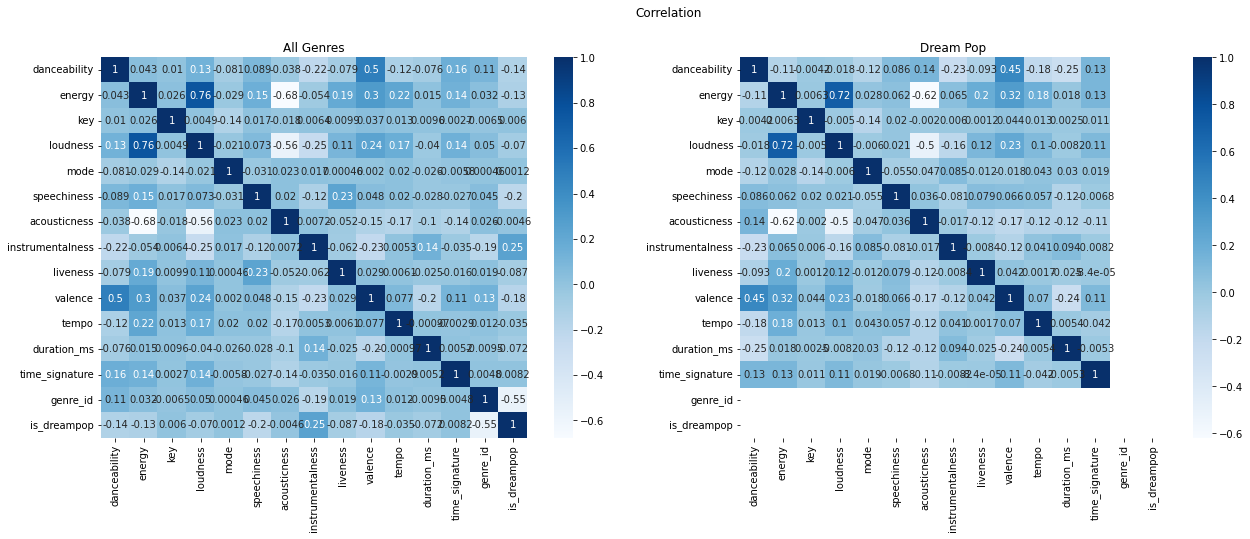

In [ ]:
#Correlation
fig, axes = plt.subplots(1, 2, figsize=(21, 7))
fig.suptitle('Correlation')
axes[0].set_title('All Genres')
axes[1].set_title('Dream Pop')

corr_all = data.corr()
sns.heatmap(corr_all, cmap="Blues", annot=True, ax=axes[0])

corr_dreampop = data.loc[data['genre'] == 'dreampop'].corr()
sns.heatmap(corr_dreampop, cmap="Blues", annot=True, ax=axes[1])

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

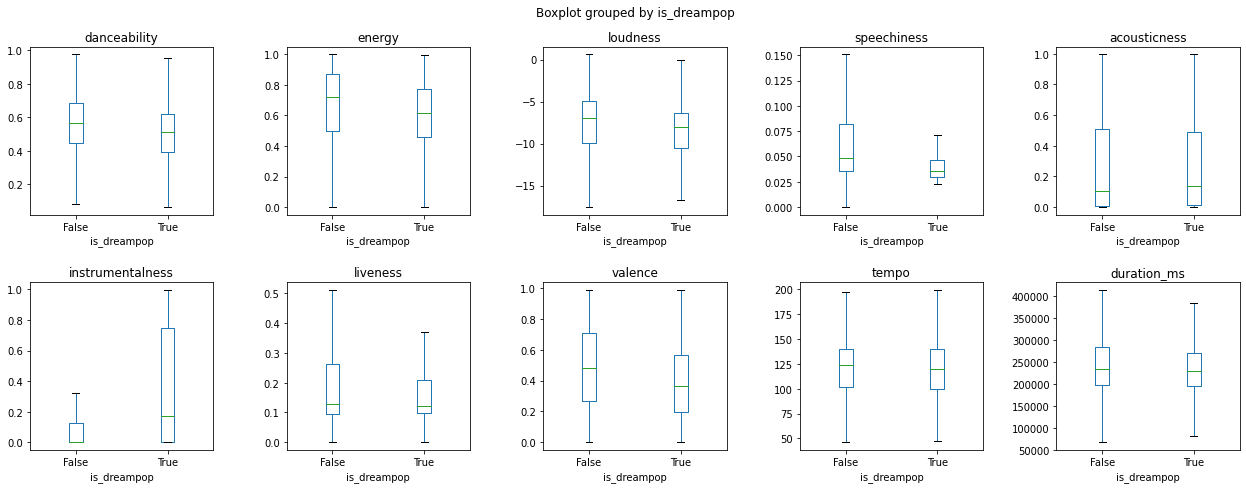

In [ ]:
#Boxplots
cols = [['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'], ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

fig_l, axes_l = plt.subplots(2, 5, figsize=(21, 7))
for i, row in enumerate(cols):
    for j, col in enumerate(cols[i]):
        data.boxplot(by='is_dreampop', column=[col], grid=False, showfliers=False, ax=axes_l[i][j])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

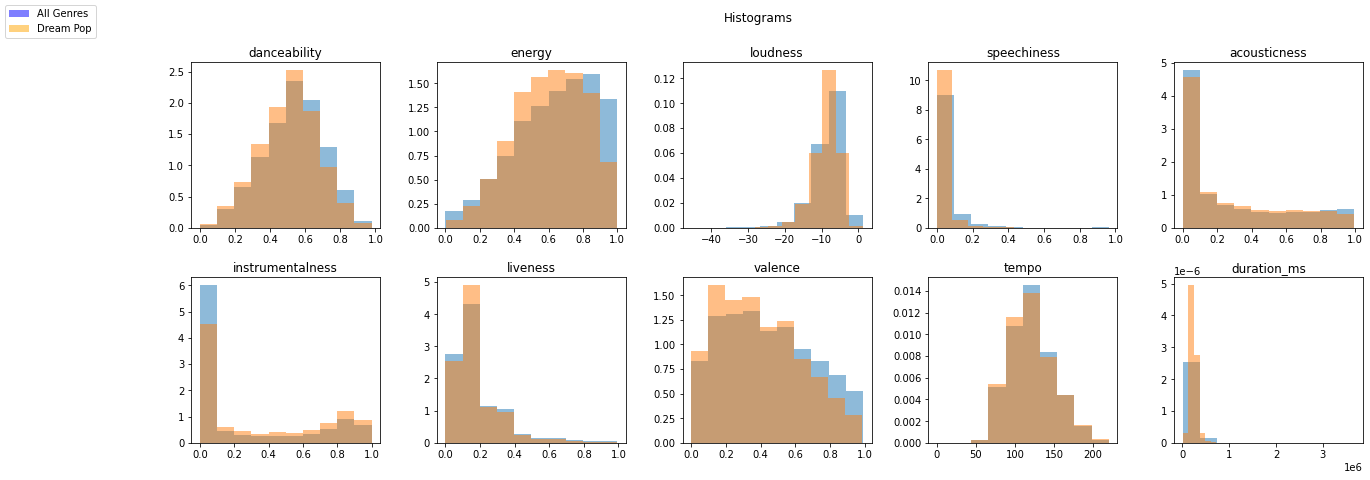

In [ ]:
#Histograms
cols = [['danceability', 'energy', 'loudness', 'speechiness', 'acousticness'], ['instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

fig_l, axes_l = plt.subplots(2, 5, figsize=(21, 7))
for i, row in enumerate(cols):
    for j, col in enumerate(cols[i]):
        data.hist(column=[col], grid=False, ax=axes_l[i][j], density=True, alpha=0.5)
        data.loc[data['is_dreampop'] == True].hist(column=[col], grid=False, ax=axes_l[i][j], density=True, alpha=0.5)

legend_elements = [Patch(facecolor='blue', label='All Genres', alpha=0.5),
                   Patch(facecolor='orange', label='Dream Pop', alpha=0.5)]
fig_l.legend(handles=legend_elements, loc='upper left')
fig_l.suptitle('Histograms')
plt.show()

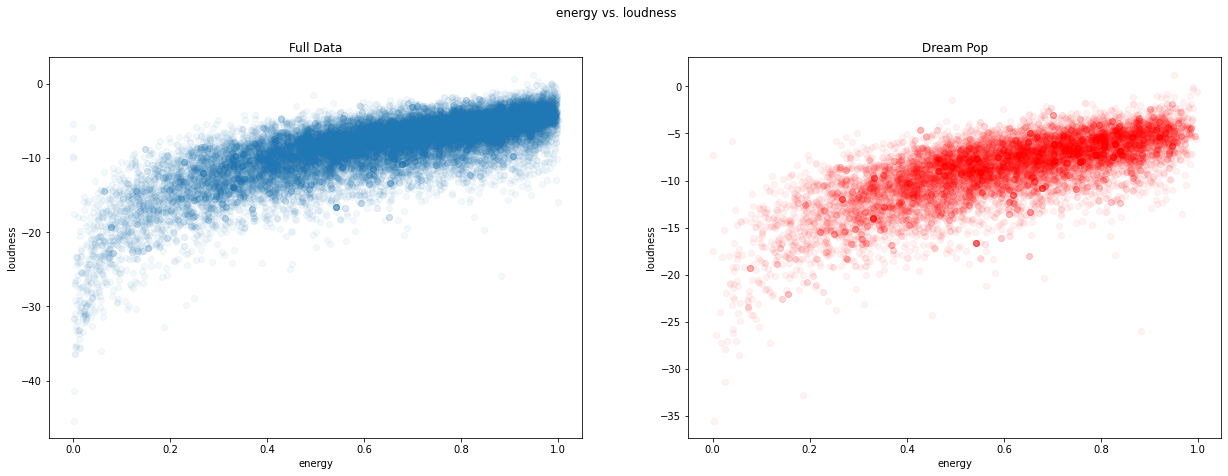

In [ ]:
# MAKE SOME MORE PLOTS HERE

x_axis = 'energy' #CHANGE ME
y_axis = 'loudness' #CHANGE ME

dp_data = data[data['is_dreampop'] == True]

fig_l, axes_l = plt.subplots(1, 2, figsize=(21, 7))
axes_l[0].scatter(data[x_axis], data[y_axis], alpha=0.05)
axes_l[1].scatter(dp_data[x_axis], dp_data[y_axis], alpha=0.05, c='red')

axes_l[0].set_xlabel(x_axis)
axes_l[0].set_ylabel(y_axis)
axes_l[1].set_xlabel(x_axis)
axes_l[1].set_ylabel(y_axis)
axes_l[0].set_title('Full Data')
axes_l[1].set_title('Dream Pop')

fig_l.suptitle('{0} vs. {1}'.format(x_axis, y_axis))
plt.show()

# Statistical Tests

In [ ]:
#KS test for each feature
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

scores = {}
for f in features:
    dp = list(data.loc[data['is_dreampop'] == True][f])
    other = list(data.loc[data['is_dreampop'] == False][f])
    scores[f] = stats.ks_2samp(dp, other).pvalue

scores = sorted(list(scores.items()), key=lambda x: x[1])

scores_df = pd.DataFrame(scores, columns =['feature', 'p-value'])
scores_df

,feature,p-value
0,speechiness,0.000000e+00
1,instrumentalness,0.000000e+00
2,loudness,4.645458e-176
3,energy,1.252228e-162
4,valence,4.354034e-123
5,danceability,1.076212e-105
6,tempo,4.458455e-50
7,liveness,2.924591e-25
8,duration_ms,2.731882e-17
9,acousticness,2.618352e-11


In [ ]:
#Mann-Whitney U test for each feature
scores = {}
for f in features:
    dp = list(data.loc[data['is_dreampop'] == True][f])
    other = list(data.loc[data['is_dreampop'] == False][f])
    scores[f] = stats.mannwhitneyu(dp, other).pvalue

scores = sorted(list(scores.items()), key=lambda x: x[1])

scores_df = pd.DataFrame(scores, columns =['feature', 'p-value'])
scores_df

,feature,p-value
0,speechiness,0.000000e+00
1,instrumentalness,0.000000e+00
2,valence,1.830537e-152
3,energy,2.708252e-141
4,loudness,8.638631e-133
5,danceability,2.739512e-122
6,duration_ms,5.687973e-16
7,tempo,1.855966e-13
8,liveness,5.348599e-06
9,acousticness,4.772920e-04


In [ ]:
#T test for each feature
scores = {}
for f in features:
    dp = list(data.loc[data['is_dreampop'] == True][f])
    other = list(data.loc[data['is_dreampop'] == False][f])
    scores[f] = stats.ttest_ind(dp, other).pvalue

scores = sorted(list(scores.items()), key=lambda x: x[1])

scores_df = pd.DataFrame(scores, columns =['feature', 'p-value'])
scores_df

,feature,p-value
0,instrumentalness,0.000000e+00
1,speechiness,1.677005e-221
2,valence,8.608213e-167
3,danceability,1.317886e-110
4,energy,1.125303e-85
5,liveness,8.542182e-42
6,duration_ms,6.750478e-29
7,loudness,5.122611e-28
8,tempo,6.243413e-08
9,acousticness,4.690408e-01


In [ ]:
from sklearn.model_selection import train_test_split

cols_to_use = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

X = data[cols_to_use]
y = data['is_dreampop']

X_train, X_valid, y_train, y_valid = train_test_split(X, y)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.482,0.866,7,-4.534,1,0.0293,0.000368,0.116000,0.2470,0.372,147.994,4
1,0.543,0.498,9,-10.152,1,0.0678,0.692000,0.432000,0.0780,0.815,113.392,4
2,0.644,0.756,7,-8.342,1,0.0273,0.567000,0.158000,0.1510,0.802,120.030,4
3,0.508,0.798,1,-5.412,0,0.0259,0.256000,0.202000,0.7010,0.481,153.950,4
4,0.562,0.724,2,-6.787,1,0.0622,0.203000,0.001150,0.1290,0.464,139.997,4
...,...,...,...,...,...,...,...,...,...,...,...,...
24243,0.396,0.544,6,-8.253,0,0.0340,0.282000,0.495000,0.1110,0.296,144.852,3
24244,0.785,0.743,9,-3.364,1,0.0441,0.058500,0.079900,0.1390,0.698,91.016,4
24245,0.749,0.592,10,-11.633,1,0.0338,0.108000,0.514000,0.0659,0.924,121.026,4
24246,0.637,0.837,6,-5.083,1,0.0318,0.057200,0.000005,0.0421,0.653,117.835,4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(5)

model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

preds = model.predict(X_valid)

acc = accuracy_score(y_valid, preds)
print("Accuracy: {:.4%}".format(acc))
    
train_predictions = model.predict_proba(X_valid)
ll = log_loss(y_valid, preds)
print("Log Loss: {}".format(ll))

Accuracy: 74.7443%
Log Loss: 8.723112889564428
